# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import expected_shortfall as ES

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [2]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [3]:
# Step 1: Download prices
tickers = ["^GSPC", "^STOXX50E", "^N225", "DJI", "EEM"]
data = yf.download(tickers, start="2020-01-01", end="2020-03-01")["Close"]
data = data.dropna()

# Step 2: Define fixed quantities
quantities = pd.Series([10, 20, 30, 10, 90], index=tickers)

# Step 3: Compute monetary positions
position_data = data.multiply(quantities, axis=1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [4]:
position_data.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-06,287034.003906,3617.435303,32462.800293,696145.781250,75050.400391
2020-01-07,285836.992188,3615.013847,32371.799316,707271.621094,75185.000000
2020-01-08,287450.996094,3635.998077,32530.500488,696142.792969,75451.201172
2020-01-09,289569.003906,3660.211258,32746.999512,712196.074219,75917.597656
2020-01-10,288238.007812,3679.581871,32653.500977,715517.109375,75790.400391


In [5]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [6]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2020-01-07,33281.626425,37417.774529,4136.148104
2020-01-08,33002.395144,37130.727666,4128.332522
2020-01-09,33575.199069,37755.223361,4180.024292
2020-01-10,33631.840192,37807.596668,4175.756476
2020-01-14,33821.716144,38016.583334,4194.867189


### Marginal VaR

In [7]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [8]:
marginal_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.029006,0.024693,0.027018,0.030539,0.032284
2020-01-08,0.029115,0.024766,0.027125,0.030483,0.032347
2020-01-09,0.029035,0.024712,0.027046,0.030525,0.032299
2020-01-10,0.028990,0.024683,0.027002,0.030548,0.032274
2020-01-14,0.028970,0.024668,0.026982,0.030558,0.032258


### Incremental, Component and Relative Component VaR

In [9]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [10]:
component_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,8291.030807,89.266204,874.615916,21599.465932,2427.247566
2020-01-08,8368.996108,90.050753,882.400212,21220.297969,2440.650103
2020-01-09,8407.506881,90.450556,885.675233,21739.483793,2452.082606
2020-01-10,8355.995284,90.821459,881.701875,21857.272686,2446.048889
2020-01-14,8383.758812,91.662165,885.854890,22025.014333,2435.425945


In [11]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [12]:
rcvar_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.249117,0.002682,0.026279,0.648991,0.072931
2020-01-08,0.253588,0.002729,0.026737,0.642993,0.073954
2020-01-09,0.250408,0.002694,0.026379,0.647486,0.073033
2020-01-10,0.248455,0.002700,0.026216,0.649898,0.072730
2020-01-14,0.247881,0.002710,0.026192,0.651209,0.072008


In [13]:
-0.031964+0.189888+0.842076

1.0

In [14]:
# Define change in position
change_vector = [0, 10000, 0, 0, 0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [15]:
ivar_series.head()

Date
2020-01-07    246.931844
2020-01-08    247.664467
2020-01-09    247.118402
2020-01-10    246.825487
2020-01-14    246.675433
dtype: float64

# ES Test

In [16]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = ES.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [17]:
marginal_es_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.033231,0.028290,0.030953,0.034988,0.036986
2020-01-08,0.033355,0.028374,0.031077,0.034923,0.037059
2020-01-09,0.033264,0.028311,0.030986,0.034971,0.037004
2020-01-10,0.033213,0.028278,0.030935,0.034997,0.036975
2020-01-14,0.033190,0.028261,0.030912,0.035010,0.036957


In [18]:
# Compute and display Component VaR (styled table)
component_es_df = ES.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [19]:
component_es_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,9498.739829,102.269122,1002.016423,24745.741769,2780.811418
2020-01-08,9588.061908,103.167952,1010.934615,24311.342486,2796.166229
2020-01-09,9632.182335,103.625993,1014.686691,24906.155263,2809.264042
2020-01-10,9573.167325,104.050923,1010.134555,25041.101819,2802.351426
2020-01-14,9604.975015,105.014090,1014.892517,25233.277473,2790.181096


In [20]:
res_df = ES.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [21]:
res_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.249117,0.002682,0.026279,0.648991,0.072931
2020-01-08,0.253588,0.002729,0.026737,0.642993,0.073954
2020-01-09,0.250408,0.002694,0.026379,0.647486,0.073033
2020-01-10,0.248455,0.002700,0.026216,0.649898,0.072730
2020-01-14,0.247881,0.002710,0.026192,0.651209,0.072008


In [22]:
0.030108+0.179338+0.790554

1.0

In [23]:
# Define change in position
change_vector = [0, 10000, 0, 0, 0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ies_series = ES.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [24]:
ies_series.head()

Date
2020-01-07    282.901053
2020-01-08    283.740393
2020-01-09    283.114786
2020-01-10    282.779203
2020-01-14    282.607292
dtype: float64

### Visualizations

Here add linea tratteggiata like in the other plots to visualize interactively


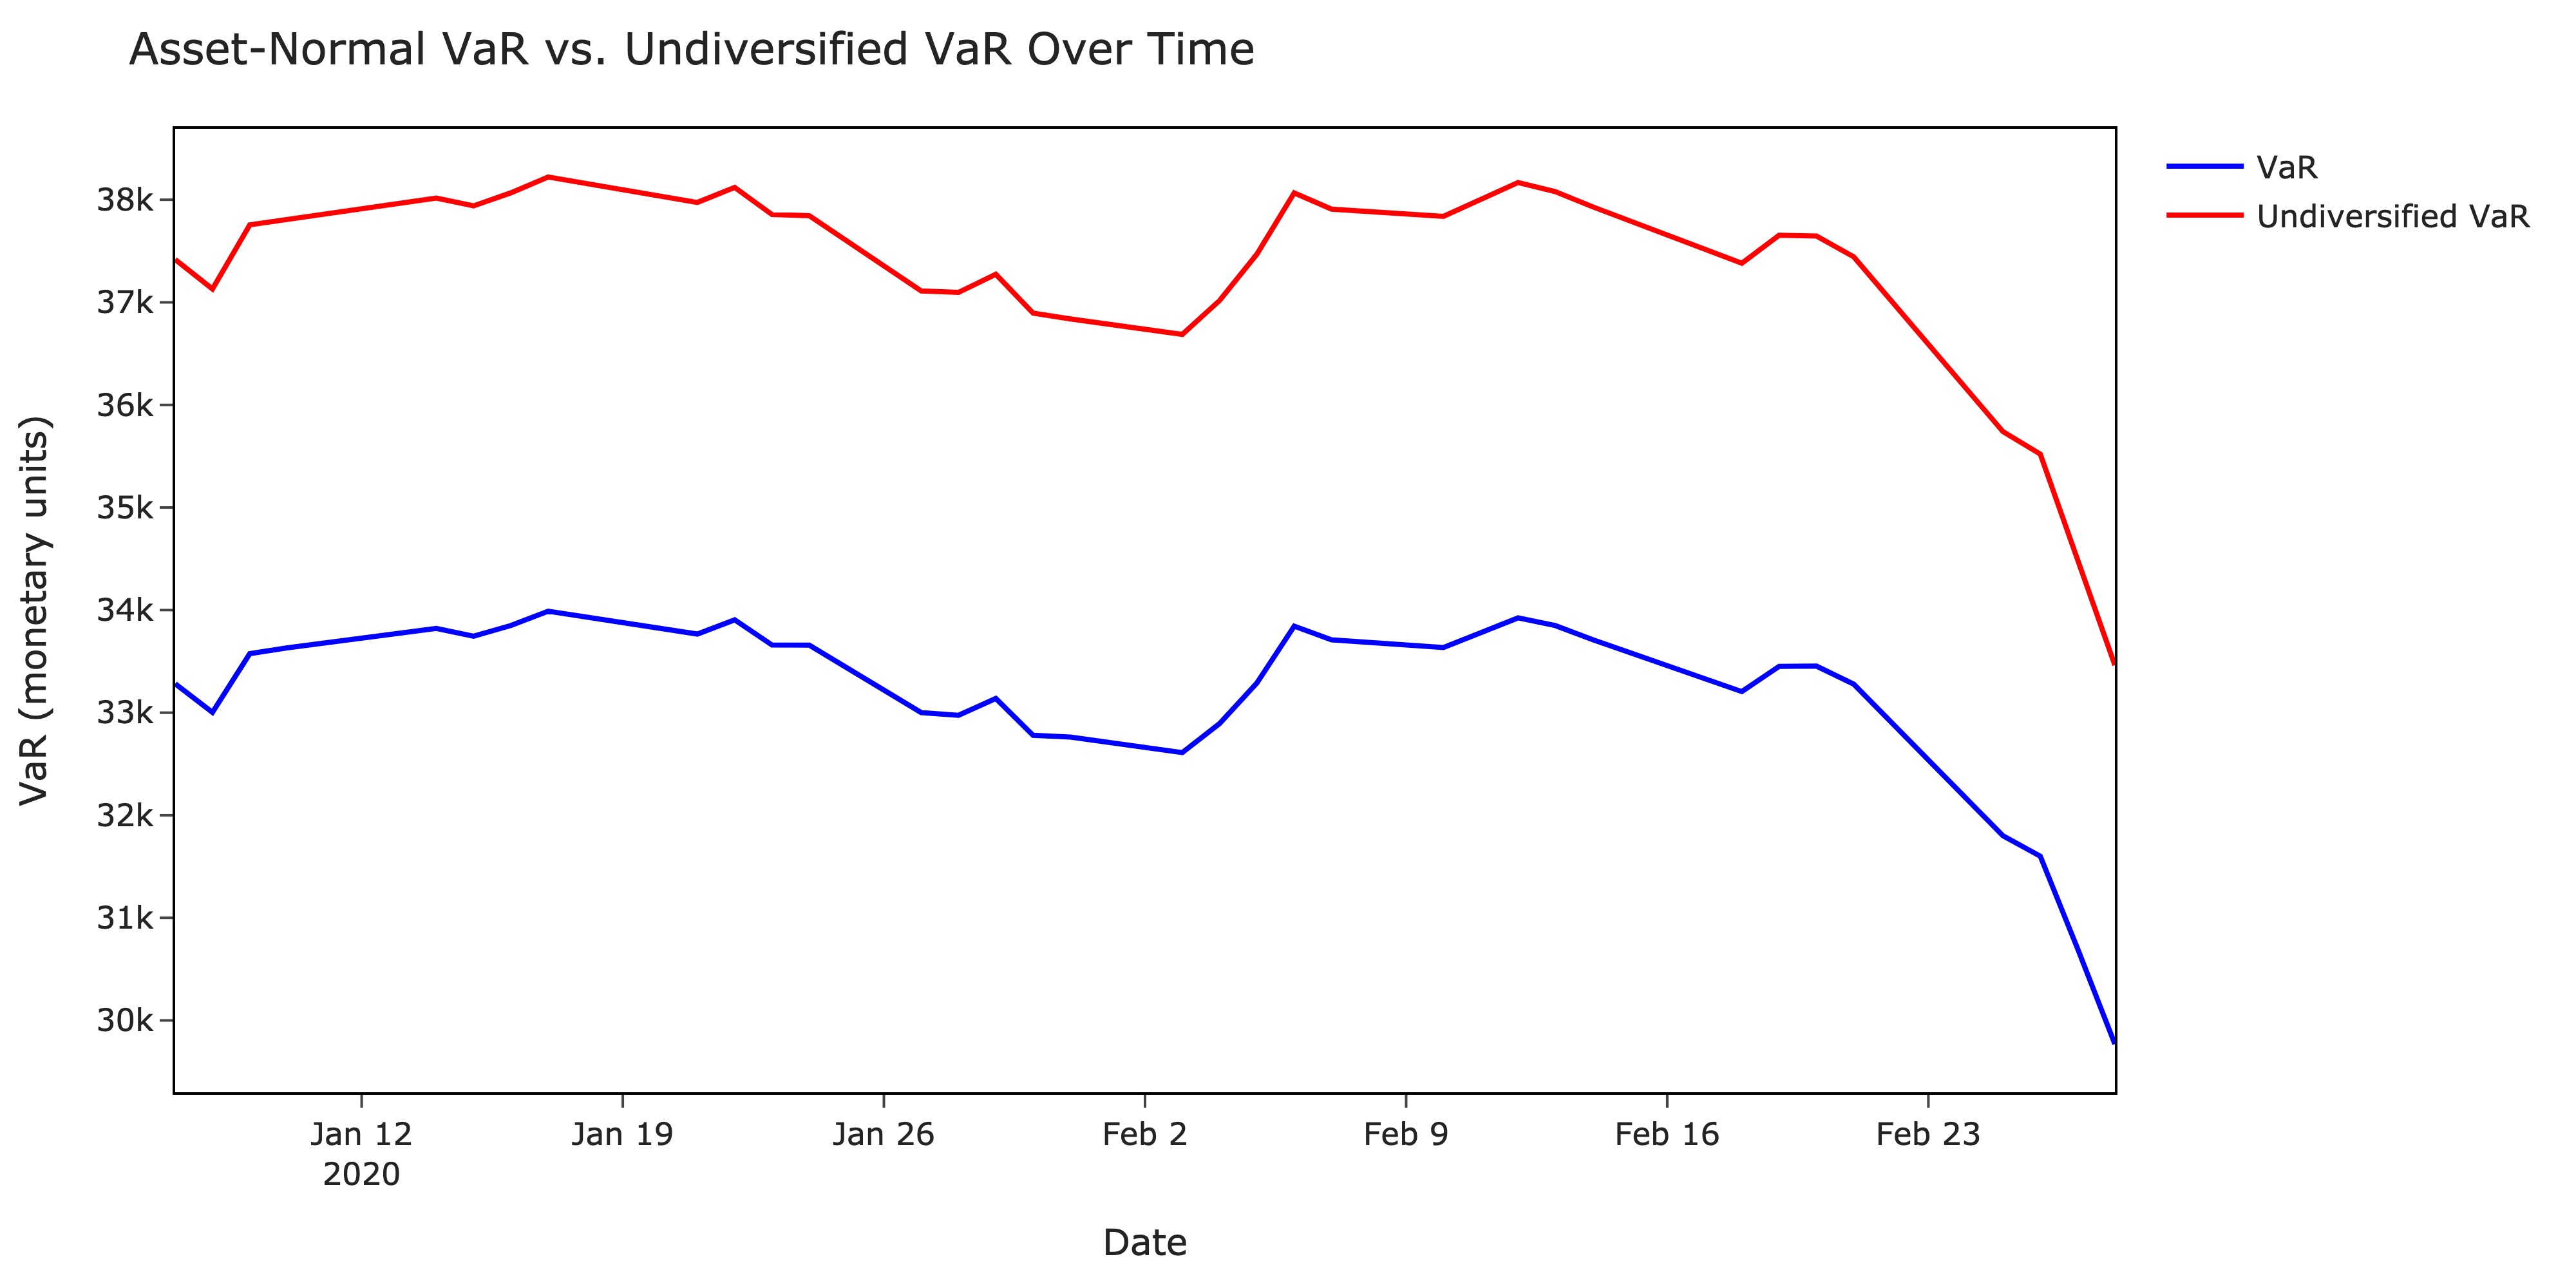

In [25]:
pl.plot_var_series(summary_df, interactive=False)


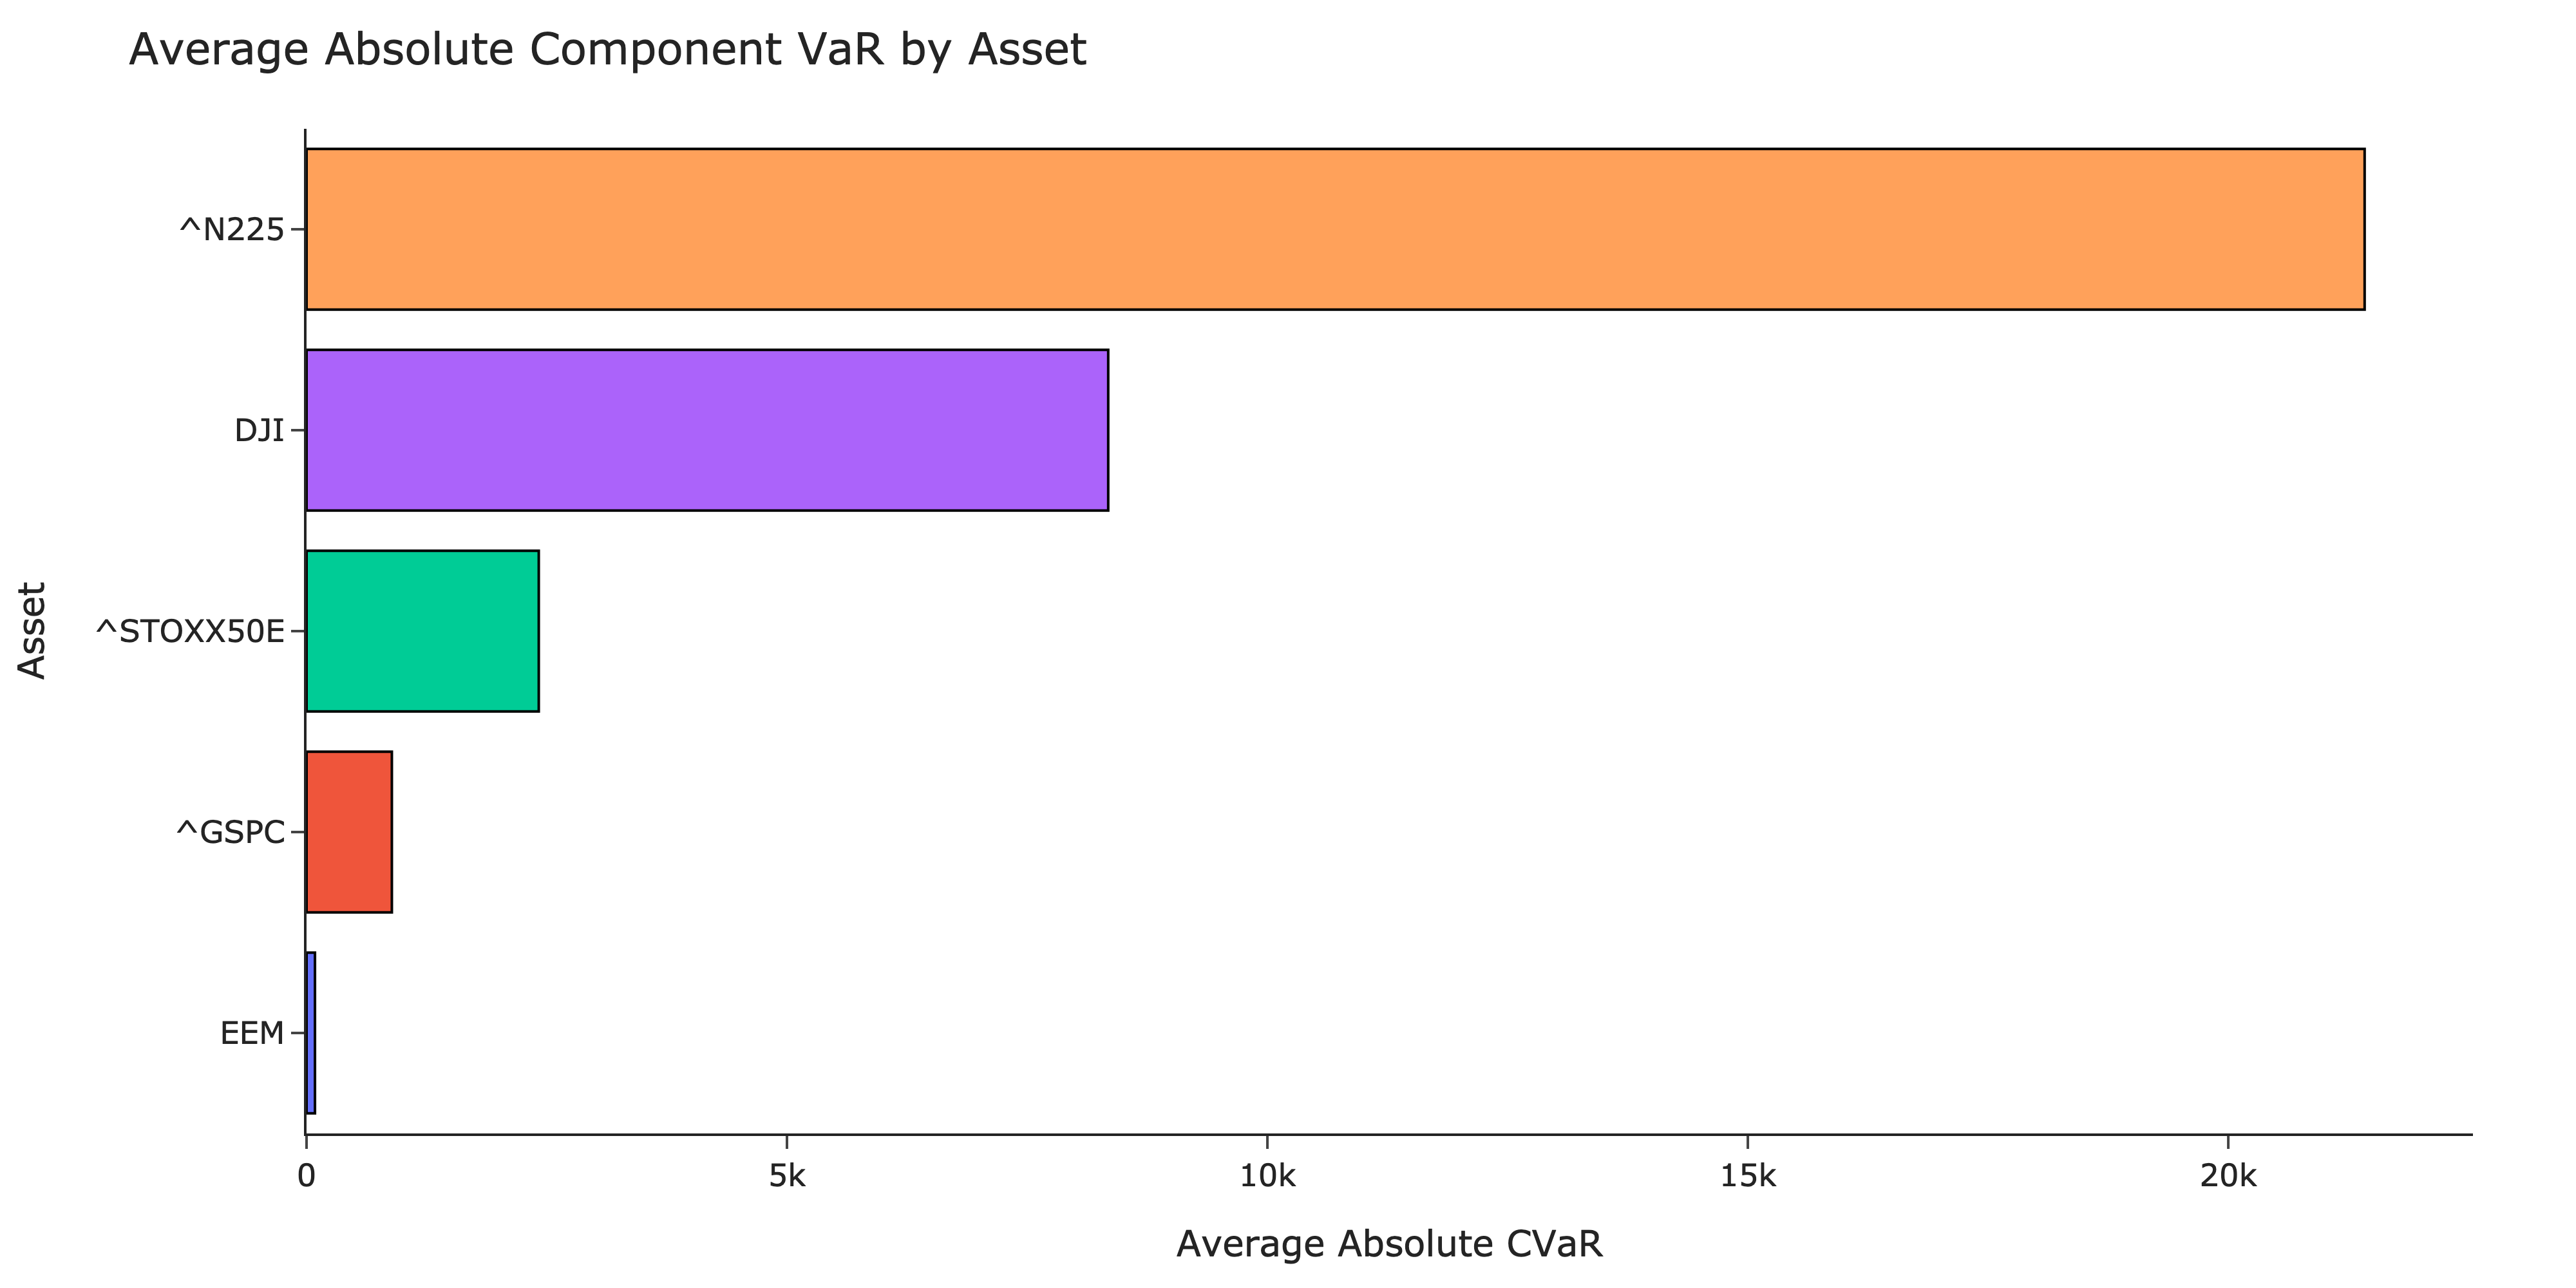

In [26]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


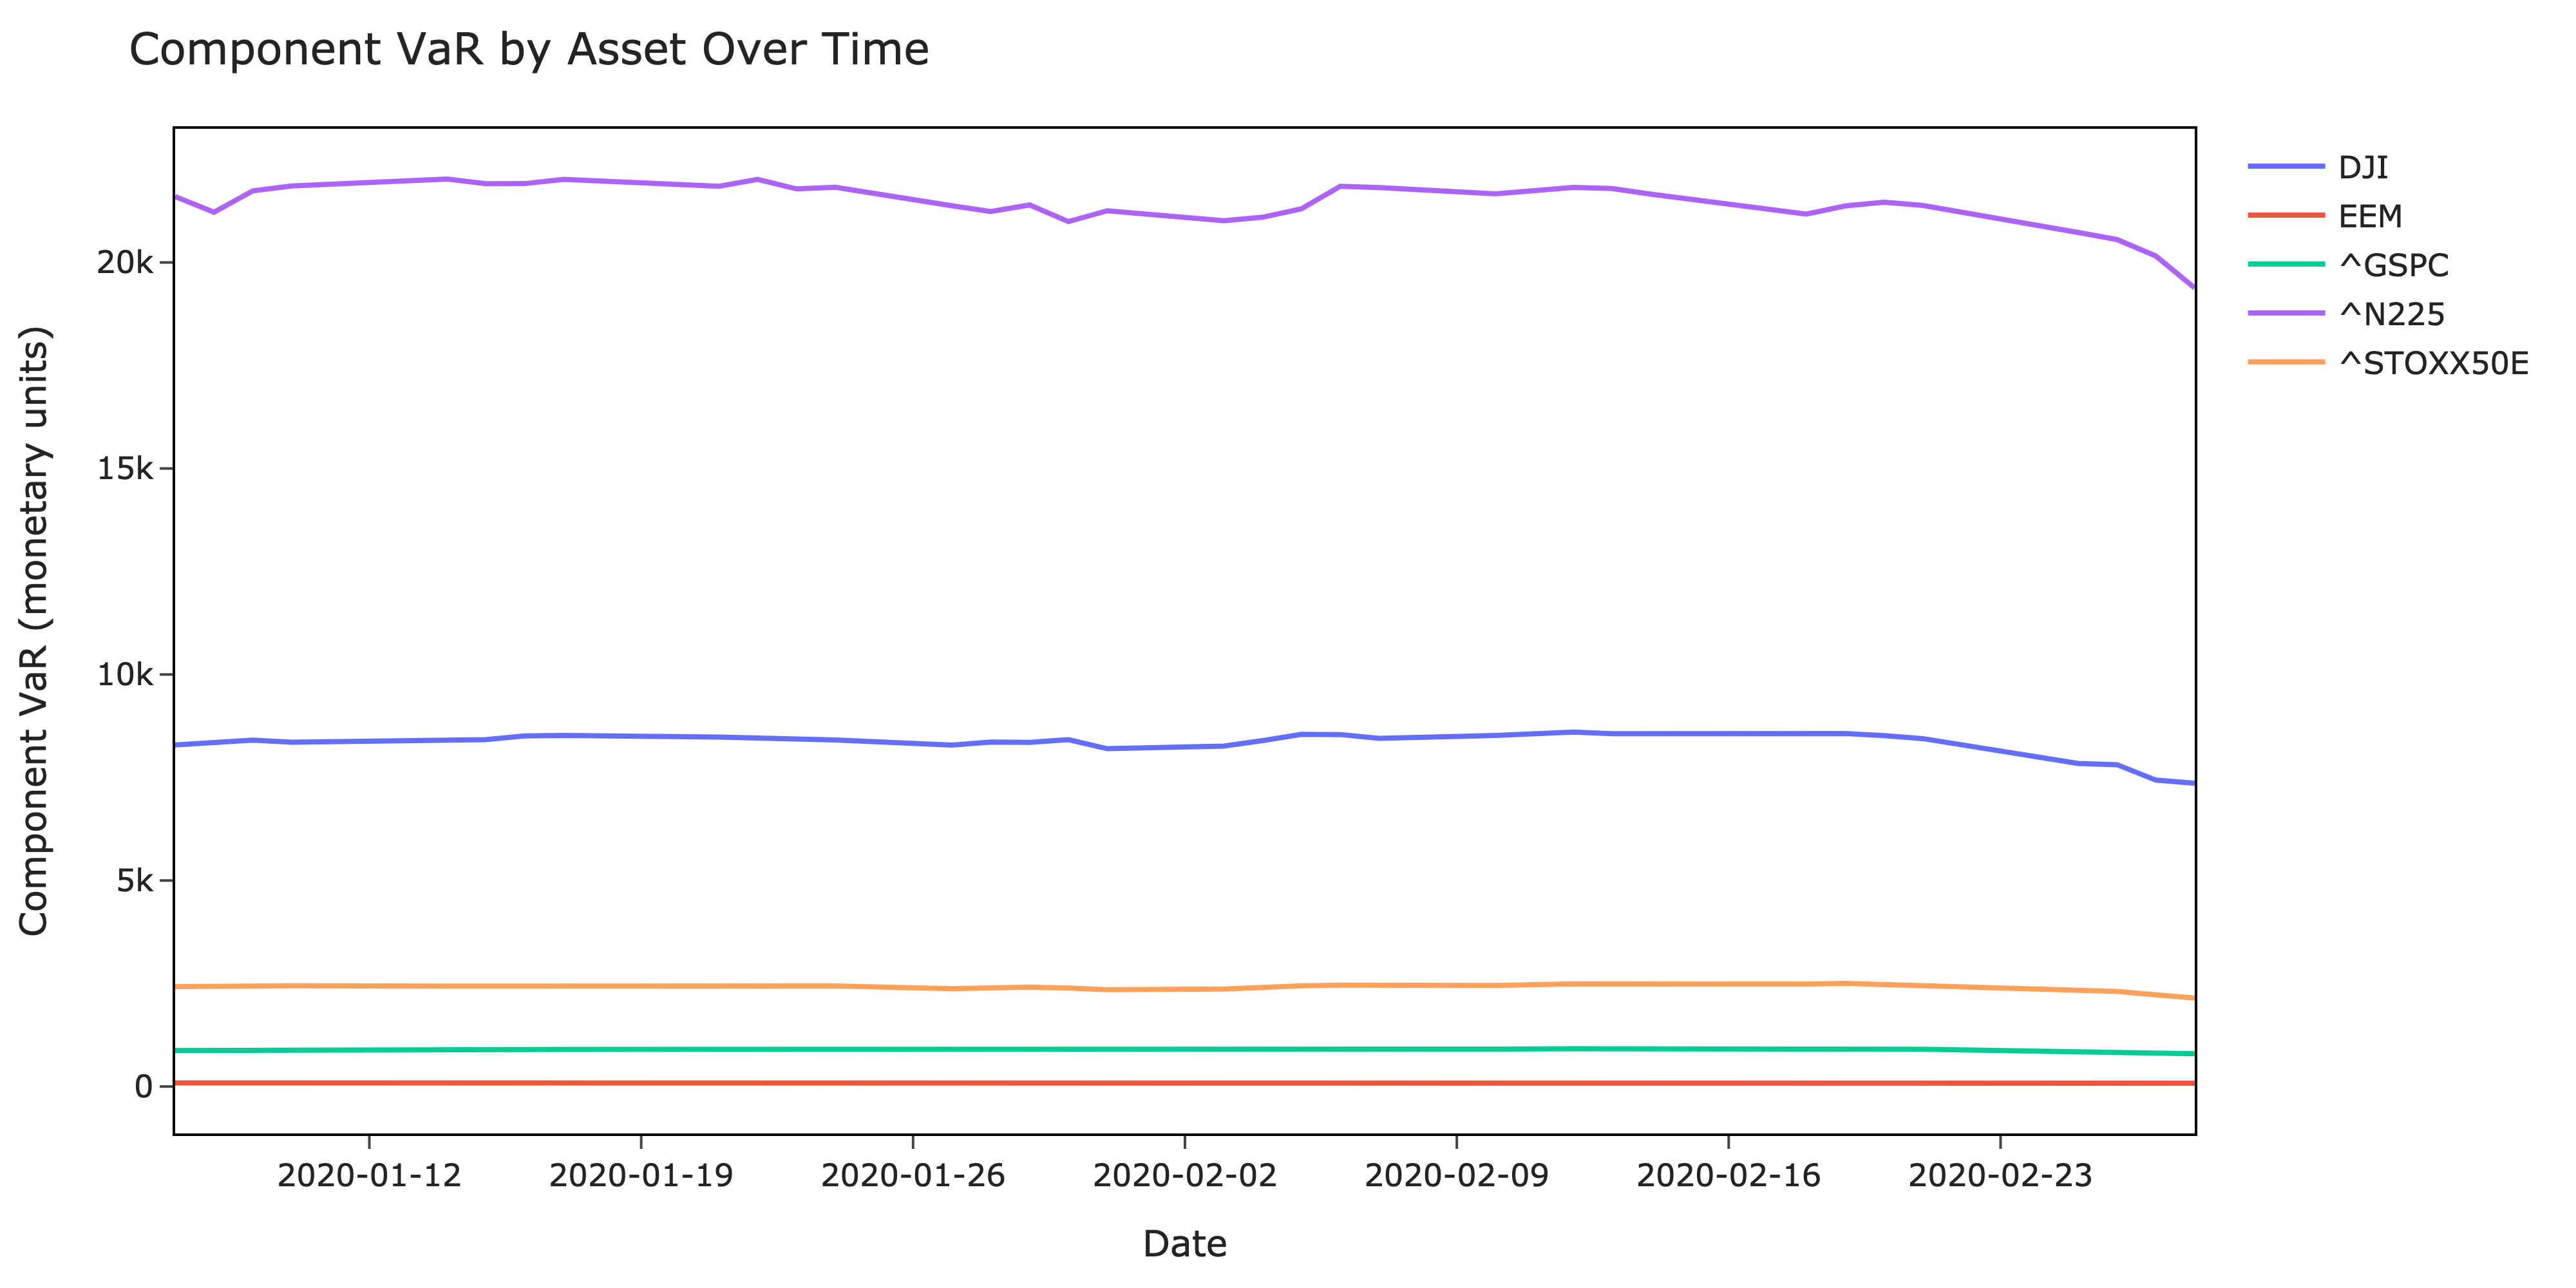

In [27]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


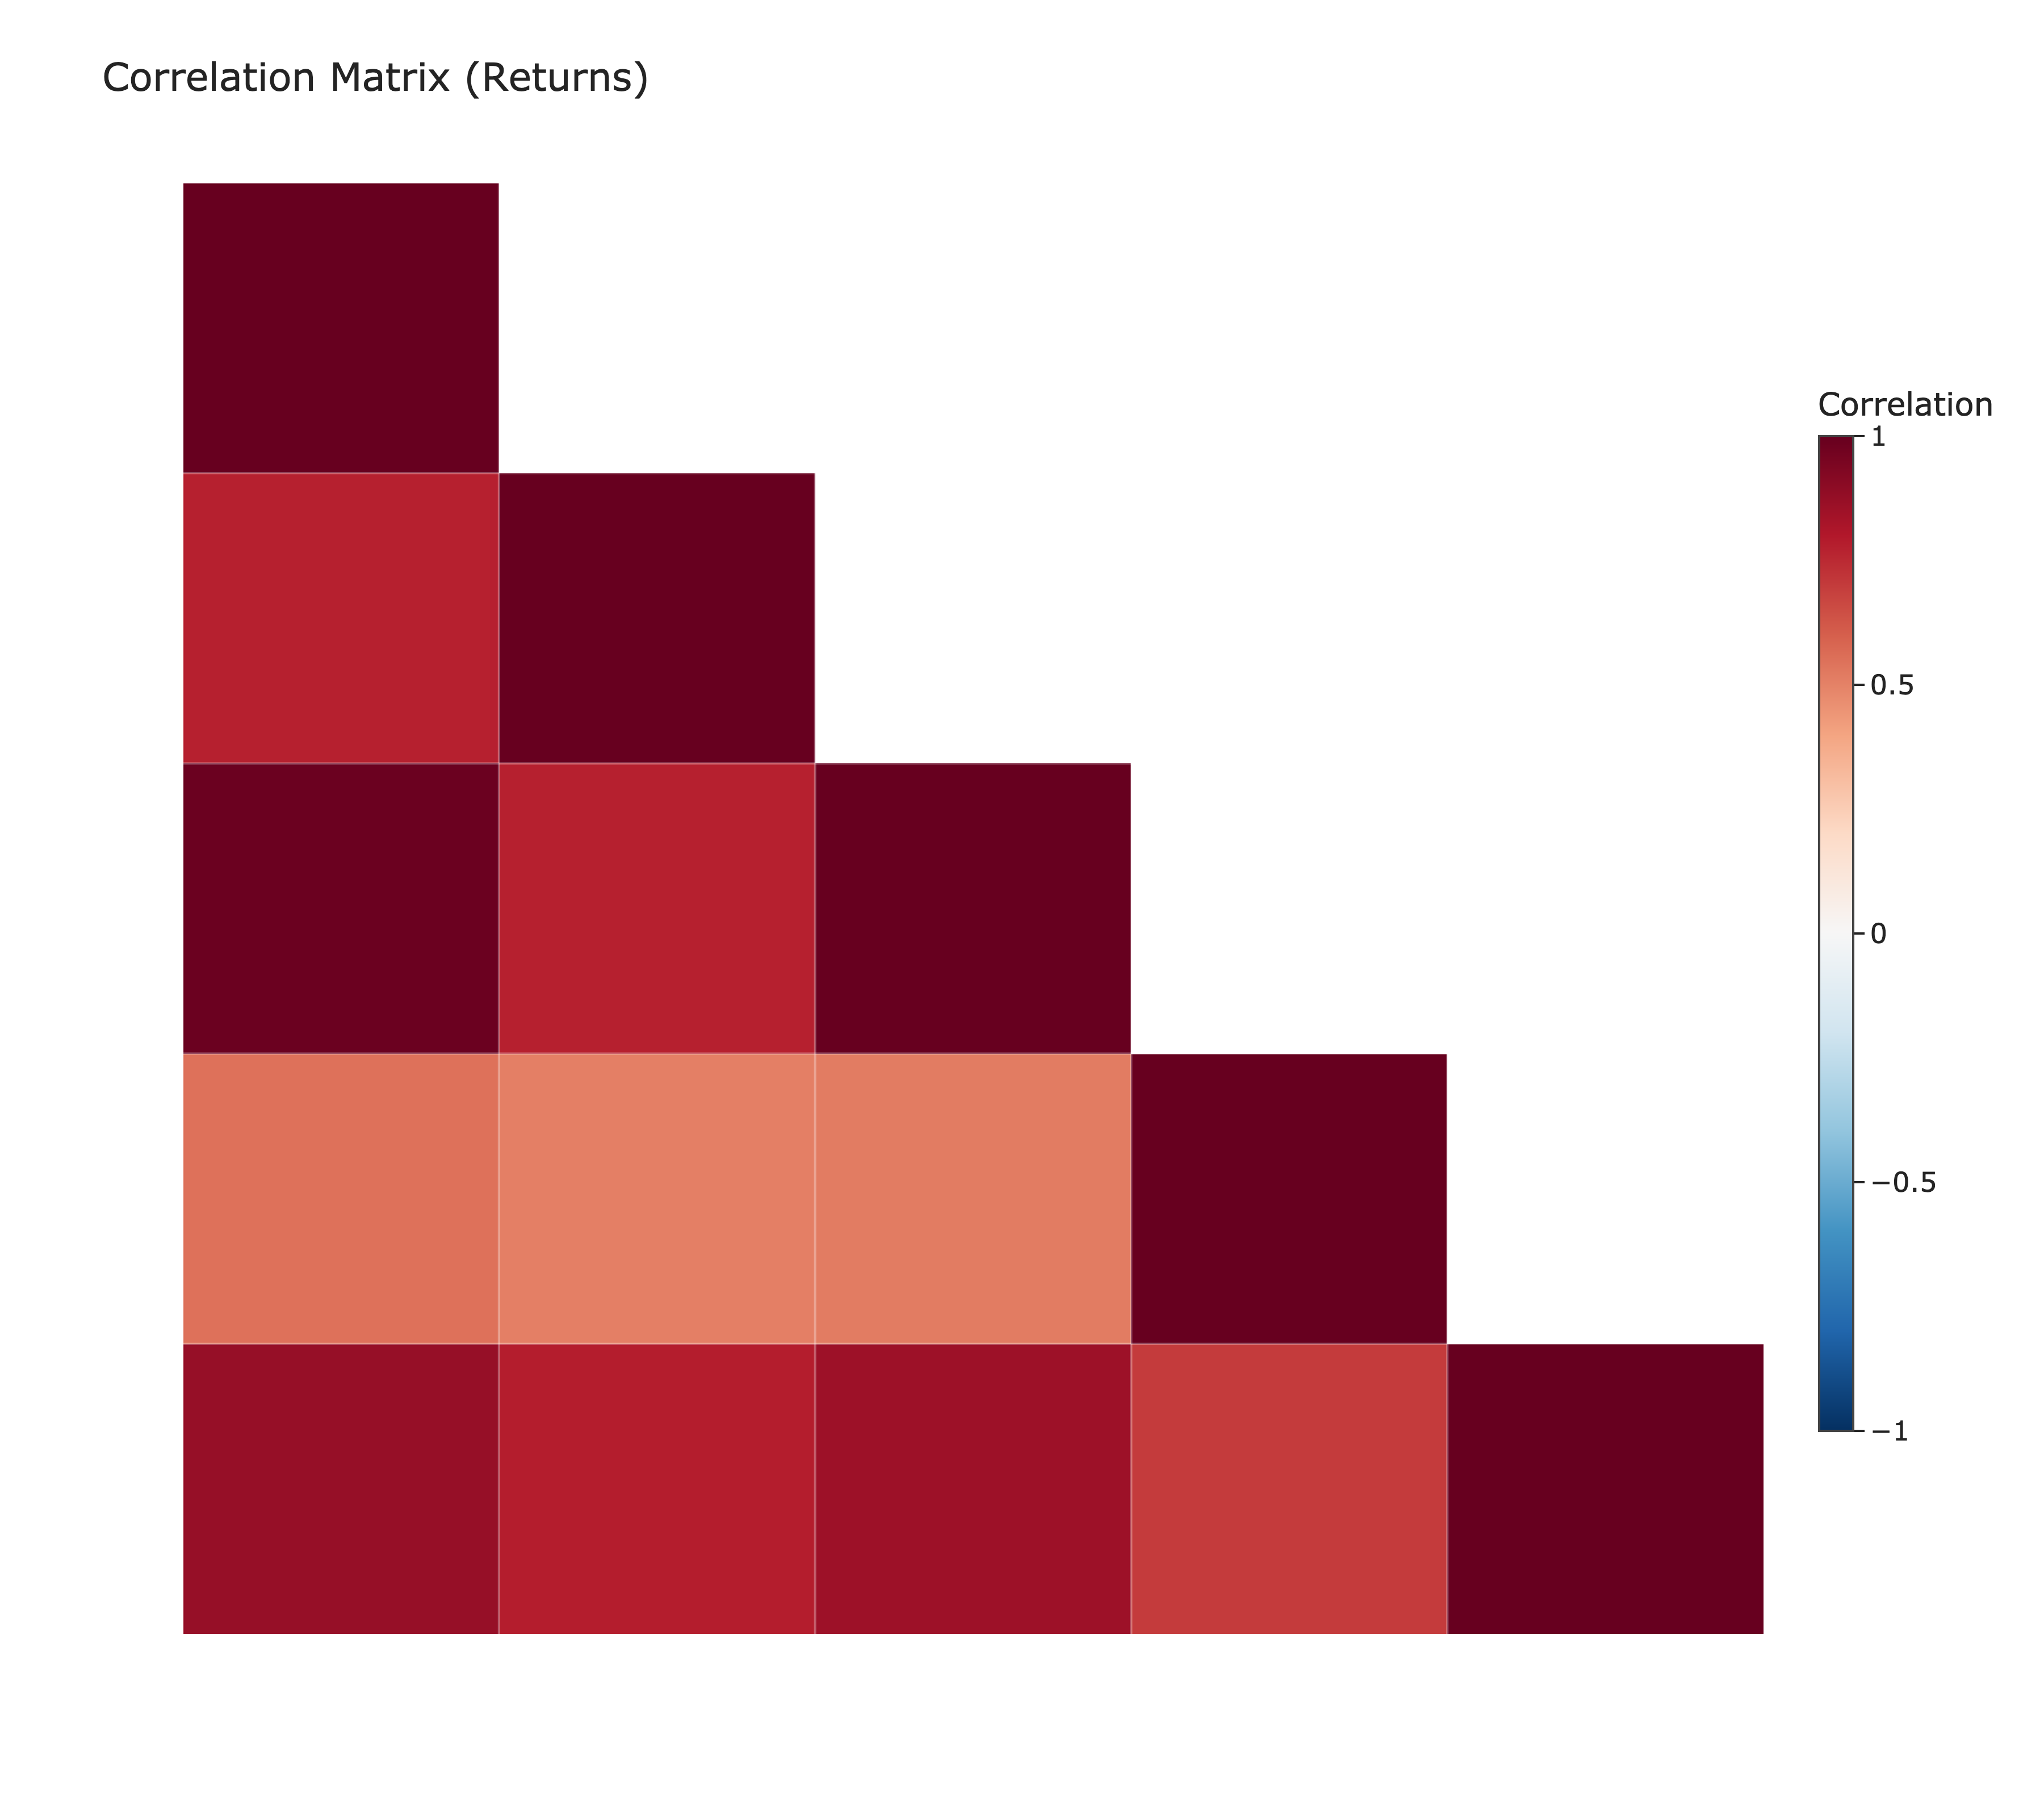

In [28]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.